# Basis functions and scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Load data

In [2]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,y,site,date
0,0,1.000000,0.933712,0.760067,0.539408,0.333740,0.180022,0.084658,0.034709,0.012406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014,2005,2023-01-01
1,1,0.999950,0.937113,0.765652,0.545377,0.338679,0.183361,0.086546,0.035614,0.012777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,2005,2023-01-01
2,2,0.999802,0.940433,0.771202,0.551358,0.343658,0.186743,0.088468,0.036539,0.013157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,2005,2023-01-01
3,3,0.999555,0.943672,0.776715,0.557350,0.348675,0.190169,0.090424,0.037485,0.013547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,2005,2023-01-01
4,4,0.999208,0.946828,0.782189,0.563351,0.353730,0.193638,0.092414,0.038451,0.013948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,2005,2023-01-01


In [3]:
X = dat.iloc[:, 1:218].to_numpy()
y = dat['y'].to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

In [5]:
aq_rf = ensemble.RandomForestRegressor()

In [6]:
aq_rf.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
y_test2 = y_test.reshape(1, -1)

In [8]:
y_test_pred = aq_rf.predict(X_test)

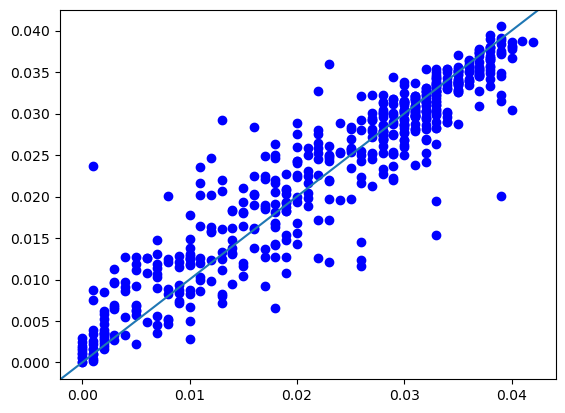

In [9]:
plt.plot(y_test, y_test_pred, 'bo')
plt.axline((0,0), slope=1)
plt.show()

In [10]:
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}")

MAE: 0.0028
MSE: 0.0000


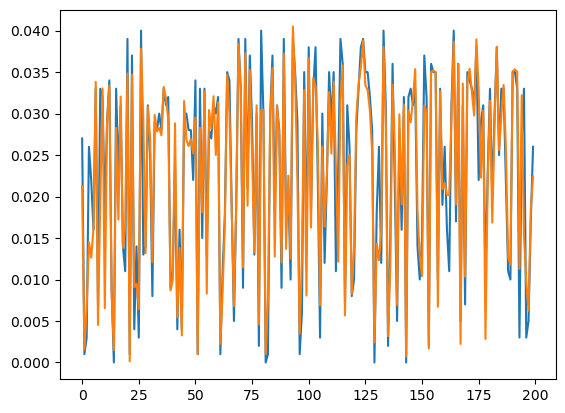

In [11]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()

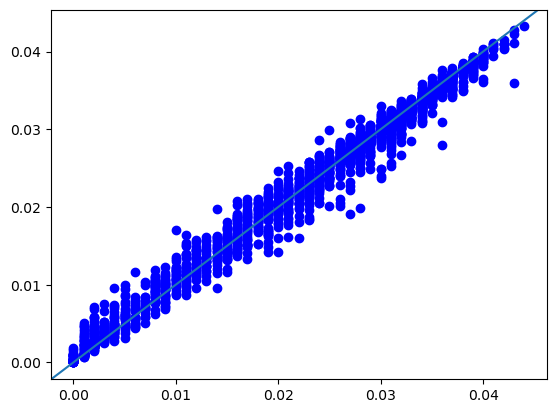

In [12]:
y_train_pred = aq_rf.predict(X_train)
plt.plot(y_train, y_train_pred, 'bo')
plt.axline((0,0), slope=1)
plt.show()